![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Samara Lima Cardoso

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

# <span style='color:red'>Laboratório 4: Morfologia Matemática</span>
***

### Importação dos Pacotes

In [1]:
import os                            # operational system para manipulação de arquivos
import cv2                           # opencv para manipulação de imagens
import numpy as np                   # numpy para manipulação de matrizes e arrays
import matplotlib.pyplot as plt      # pyplot para plotagem de gráficos e imagens
import skimage.morphology            # scikit-image para produzir elementos estruturantes
import urllib.request as url         # urllib para baixar arquivos via HTTPS
import zipfile                       # zipfile para lidar com pastas compactadas

In [ ]:
# baixando as imagens de referência
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

### Operações Lógicas em Imagens Binárias

É possível submeter imagens a operações lógicas de modo a obter novas imagens. Nesse contexto, a biblioteca OpenCV disponibiliza um conjunto de funções para implementação dessas operações:

1. AND: **C = A $\cap$ B**   
    * `C = cv2.bitwise_and( A, B )`
2. OR: $C = A \cup B$   
    * `C = cv2.bitwise_or( A, B )`
3. XOR: $C = A \oplus B$   
    * `C = cv2.bitwise_xor( A, B )`
4. Not: $C = \overline{A}$   
    * `C = ~A`
5. Diferença: $C = A \cap \overline{B} $   
    *  `C = A - B` 
    
    
**Obs:** a função `cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY)` pode ser utilizada para binarizar imagens de tipo `uint`, sendo necessário informar o limiar de binarização e o valor do nível alto. A função retorna o limiar utilizado e a imagem binarizada, com pixels de nível alto setados para `vmax` e os demais para 0.

 ## <span style='color:blue'>Questão 1: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Carregue as imagens “**A.tif**” e “**B.tif**”. Faça uma binarização e realize as operações abaixo. Plote os resultados e os comente.

    * 1. $A$  
    * 2. $B$  
    * 3. $C = A \cap B$ 
    * 4. $D = A - B$   
    * 5. $E = \overline{A}$    
    * 6. $F = \overline{B}$  
    * 7. $G = A \cup B$  
    * 8. $H = B - A$ 

Text(0.5, 0, 'Dimensões (313, 316)')

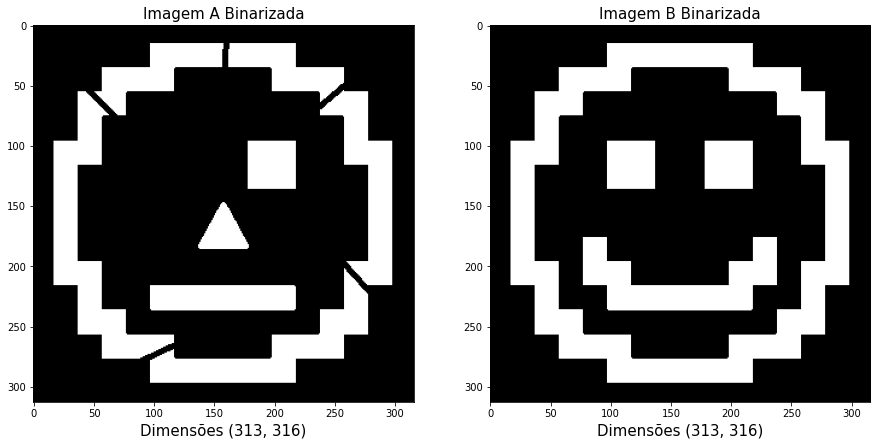

In [2]:
ima = cv2.imread('imagens/A.tif')
ima = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
imb = cv2.imread('imagens/B.tif')
imb = cv2.cvtColor(imb, cv2.COLOR_BGR2GRAY)
 
# aplicando a binarização nas imagens carregadas
ima_bin = cv2.threshold( ima, 127.5, 255, cv2.THRESH_BINARY)[1]
imb_bin = cv2.threshold( imb, 127.5, 255, cv2.THRESH_BINARY)[1]

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))

# primeira figura da subplotagem
axs[0].imshow(ima_bin, cmap = 'gray', vmin = np.min(ima_bin), vmax = np.max(ima_bin))
axs[0].set_title('Imagem A Binarizada', size = 15)
axs[0].set_xlabel('Dimensões ' + str(ima_bin.shape), size = 15)

# segunda figura da subplotagem
axs[1].imshow(imb_bin, cmap = 'gray', vmin = np.min(imb_bin), vmax = np.max(imb_bin))
axs[1].set_title('Imagem B Binarizada', size = 15)
axs[1].set_xlabel('Dimensões ' + str(imb_bin.shape), size = 15) 

Text(0.5, 0, 'Dimensões (313, 316)')

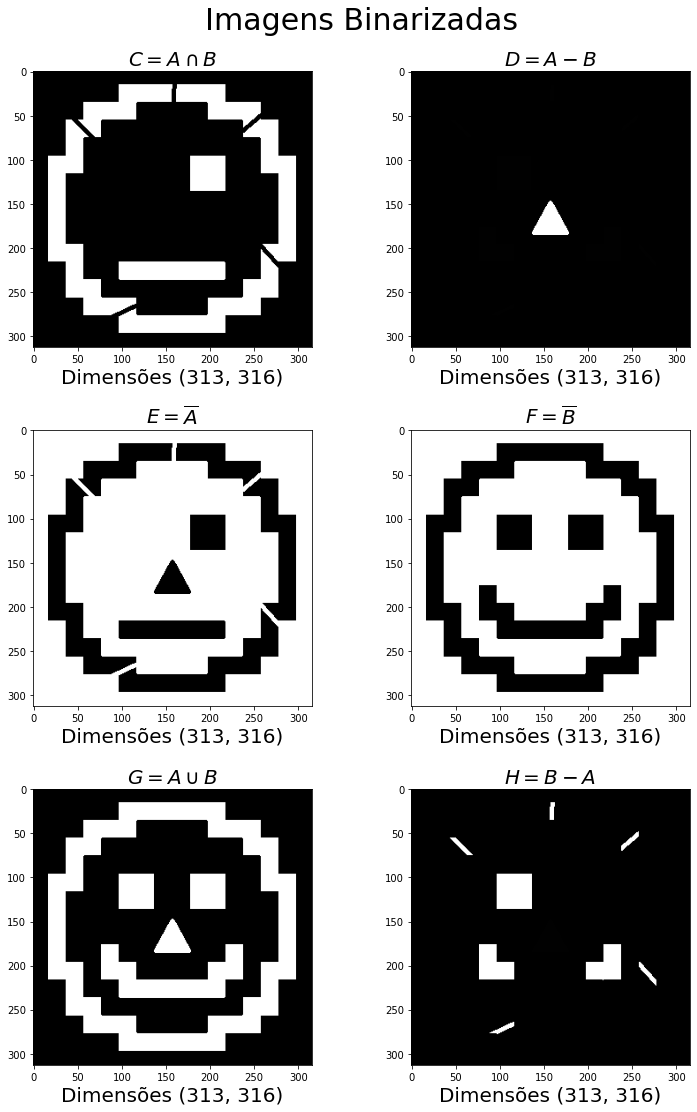

In [3]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1
# operação lógica 3
imc = cv2.bitwise_and( ima, imb )
# operação lógica 4
imd = ima - imb
# operação lógica 5
ime = ~ima
# operação lógica 6
imf = ~imb
# operação lógica 7
img = cv2.bitwise_or( ima, imb )
# operação lógica 8
imh = imb-ima

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
plt.subplots_adjust(left = 0, bottom = 0, right = 0.7, top = 0.92, wspace = 0, hspace = 0.3)
fig.suptitle('Imagens Binarizadas', size = 30, x = 0.35) 

# primeira figura da subplotagem
axs[0,0].imshow(imc, cmap='gray', vmin = np.min(imc), vmax = np.max(imc))
axs[0,0].set_title('$C = A \cap B$', size = 20)
axs[0,0].set_xlabel('Dimensões ' + str(imc.shape), size = 20)

# segunda figura da subplotagem
axs[0,1].imshow(imd, cmap='gray', vmin = np.min(imd), vmax = np.max(imd))
axs[0,1].set_title('$D = A - B$ ', size = 20)
axs[0,1].set_xlabel('Dimensões ' + str(imd.shape), size = 20)

# terceira figura da subplotagem
axs[1,0].imshow(ime, cmap='gray', vmin=np.min(ime), vmax=np.max(ime))
axs[1,0].set_title('$E = \overline{A}$', size=20)
axs[1,0].set_xlabel('Dimensões ' + str(ime.shape), size=20)

# quarta figura da subplotagem
axs[1,1].imshow(imf, cmap='gray', vmin = np.min(imf), vmax = np.max(imf))
axs[1,1].set_title('$F = \overline{B}$', size = 20)
axs[1,1].set_xlabel('Dimensões ' + str(imf.shape), size = 20)

# quinta figura da subplotagem
axs[2,0].imshow(img, cmap='gray', vmin = np.min(img), vmax = np.max(img))
axs[2,0].set_title('$G = A \cup B$', size = 20)
axs[2,0].set_xlabel('Dimensões ' + str(img.shape), size = 20)

# sexta figura da subplotagem
axs[2,1].imshow(imh, cmap = 'gray', vmin = np.min(imh), vmax = np.max(imh))
axs[2,1].set_title('$H = B - A$', size = 20)
axs[2,1].set_xlabel('Dimensões ' + str(imh.shape), size = 20) 

## <span style='color:green'>Respostas da Questão 1:</span>

* Plotando as imagens é possivel ver que as operações foram realizadas corretamente:
*     -> na primeira imagem ela recebe apenas oq aparece em a e b (em branco)
*     -> na segunda imagem ela recebe tudo oq tem em A retirando oq tem em B, ou seja, mostra somente o triângulo.
*     -> na terceira imagem, not A, ela recebe o inverso de A, ou seja, o que era branco fica preto e o que era preto fica             branco.
*     -> na quarta imagem, not B, ela recebe o inverso de B, ou seja, o que era branco fica preto e o que era preto fica    branco.
*     -> na quinta imagem, ela recebe a união das de A e A, logo tudo o que aparece tanto em A como em B aparece nela.
*     -> na sexta imagem ela recebe tudo oq tem em A retirando oq tem em B, ou seja, mostra somente o que não tem em A e tem            em B

## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* O código abaixo aplica uma das máscaras binárias da questão anterior sobre uma imagem. Com relação à imagem resultante, responda:
 * (a) Qual o efeito de aplicar uma máscara binária sobre uma imagem?
 * (b) Cite pelo menos duas possíveis aplicações dessa operação. Qual o papel das máscaras nessas aplicações?
 * (c) Tendo em vista a quantidade de tons de cinza na máscara, qual a importância do tipo de interpolação utilizado?  

Text(0.5, 1.0, 'Imagem Resultante')

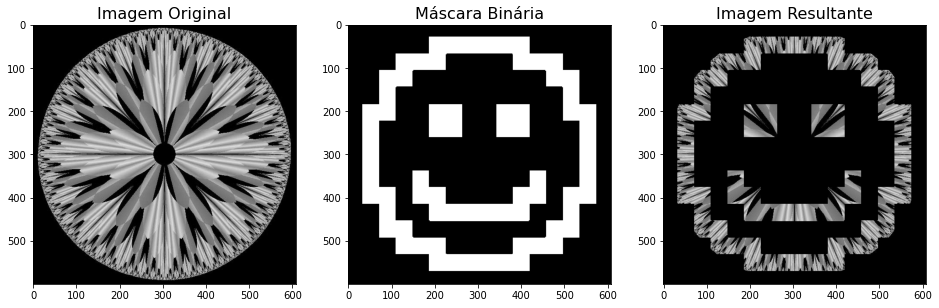

In [3]:
# imagem mandala
mandala = cv2.imread( os.path.join(".", "imagens", "mandala.jpg"), 0 )
H, W = mandala.shape

# imagem b
B = cv2.imread( os.path.join(".", "imagens", "B.tif"), 0 )
_, B = cv2.threshold(B, 127, 255, cv2.THRESH_BINARY)
B_resized = cv2.resize(B, (W, H), interpolation = cv2.INTER_NEAREST)

# imagem d
combined = cv2.bitwise_and( mandala, B_resized )

# plotagem
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 8))

# primeira subfigura da primeira linha
axs[0].imshow(mandala, vmin=0, vmax=255, cmap="gray")
axs[0].set_title("Imagem Original", fontsize = 16)

# segunda subfigura da primeira linha
axs[1].imshow(B_resized, vmin=0, vmax=255, cmap="gray")
axs[1].set_title("Máscara Binária", fontsize = 16)

# terceira subfigura da primeira linha
axs[2].imshow(combined, vmin=0, vmax=255, cmap="gray")
axs[2].set_title("Imagem Resultante", fontsize = 16)

## <span style='color:green'>Respostas da Questão 02:</span>
* (a) Adicione sua resposta aqui.
* (b) Adicione sua resposta aqui.
* (c) Adicione sua resposta aqui.

### Transformações Lineares

Também é possível realizar transformações lineares como rotação e translação com o OpenCV. Para isso, faz-se uso da função **warpAffine**.

`dst_img = cv2.warpAffine(src_img, M, (cols, rows))`

Descrição:  
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **M** corresponde à matriz de transformação utilizada;
* **rows** corresponde ao número de linhas da imagem;
* **cols** corresponde ao número de colunas da imagem;

Alguns exemplos de transformações que podem ser produzidas a partir desta função são:

1. Translações:
    * Para transladar a imagem Tx pixels para a direita e Ty pixels para baixo, faz-se uso de uma matriz com forma: 
    * **M = [ [1, 0, Tx], [0, 1, Ty] ]**
2. Rotações:
    * A matriz de transformação para uma rotacão de $\theta$ graus com relação ao ponto (Px, Py) pode ser obtida utilizando a função **getRotationMatrix2D**: 
    * `M = cv2.getRotationMatrix2D( (Px, Py), $\theta$, scale)`
3. Reflexão:
    * A imagem pode ser refletida utilizando as seguintes matrizes: 
    * **M = [ [-1, 0, cols-1], [0, 1, 0] ]**
    * **M = [ [1, 0, 0], [0, -1, rows-1] ]**

## <span style='color:blue'>Questão 3: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* (a) O código abaixo implementa algumas das transformações descritas. Comente todas as linhas desse código e explique o que o programa faz.
* (b) Que transformações são implementadas pelas matrizes Ma, Mb, Mc e Md?
* (c) As imagens 2 e 4 são diferentes apesar de terem sofrido as mesmas transformações. Por que isso aconteceu?

Text(0.5, 1.0, 'Imagem 6')

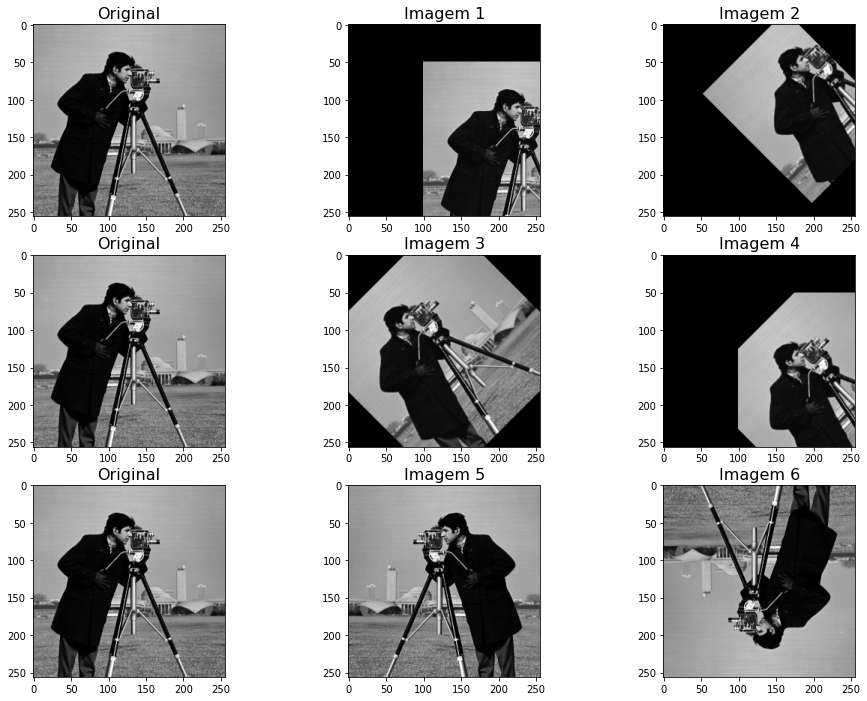

In [5]:
# COMENTE AS LINHAS DE CÓDIGO ABAIXO --> QUESTÃO 3 - LETRA (a)
Tx    = 100
Ty    =  50
theta =  45

src_img = cv2.imread(os.path.join(".", "imagens", "cameraman.jpg"), 0) #imagem de entrada
rows, cols = src_img.shape

# definição das matrizes de transformação utilizadas
Ma = np.array( [ [1, 0, Tx], [0, 1, Ty] ], dtype=np.float32 ) # Translação
Mb = cv2.getRotationMatrix2D( (cols/2, rows/2),  theta , 1) # Rotação
Mc = np.array( [[-1, 0, cols-1], [0, 1, 0]], dtype = np.float32 ) # Reflexão
Md = np.array( [[1, 0, 0], [0, -1, rows-1]], dtype = np.float32 ) # Reflexão

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 12))

axs[0][0].imshow(src_img, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

dst_img = cv2.warpAffine(src_img, Ma, (cols, rows))
axs[0][1].imshow(dst_img, cmap="gray")
axs[0][1].set_title("Imagem 1", fontsize = 16)

dst_img = cv2.warpAffine(dst_img, Mb, (cols, rows)) # aplicação da transformação linear
axs[0][2].imshow(dst_img, cmap="gray")
axs[0][2].set_title("Imagem 2", fontsize = 16)

axs[1][0].imshow(src_img, cmap="gray")
axs[1][0].set_title("Original", fontsize = 16)

dst_img = cv2.warpAffine(src_img, Mb, (cols, rows))# aplicação da transformação linear
axs[1][1].imshow(dst_img, cmap="gray")
axs[1][1].set_title("Imagem 3", fontsize = 16)

dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows)) # aplicação da transformação linear
axs[1][2].imshow(dst_img, cmap="gray")
axs[1][2].set_title("Imagem 4", fontsize = 16)

axs[2][0].imshow(src_img, cmap="gray")
axs[2][0].set_title("Original", fontsize = 16)

dst_img = cv2.warpAffine(src_img, Mc, (cols, rows)) # aplicação da transformação linear
axs[2][1].imshow(dst_img, cmap="gray")
axs[2][1].set_title("Imagem 5", fontsize = 16)

dst_img = cv2.warpAffine(dst_img, Md, (cols, rows)) # aplicação da transformação linear
axs[2][2].imshow(dst_img, cmap="gray")
axs[2][2].set_title("Imagem 6", fontsize = 16)

## <span style='color:green'>Respostas da Questão 03:</span>

* (b) na matriz Ma a transformação é de Translação, já na matriz Mb a transformação é de Rotação e na matriz Mc e Md a transformação é de Reflexão
* (c) isso ocorre pois suas matrizes de transformações são diferentes

## <span style='color:blue'>Questão 4: [Valor da Questão: 1.5][Taxa de acerto: x.x]</span>

* Abra a imagem "**Seta.tif**", realize operações abaixo e comente os resultados obtidos.
 * Translação de -50 pixels na horizontal e   0 pixels na vertical.
 * Translação de 125 pixels na horizontal e -75 pixels na vertical.
 * Reflexão horizontal.
 * Reflexão vertical.
 * Rotação de -25° com relação ao ponto (x =  59, y =  78) e escala   1.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala   3.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala 1/3.
 * Rotação de   0° com relação ao ponto (x =  59, y =  59) e escala 1/4.

In [6]:
def make_translation(input_image, tx, ty):
    '''função auxiliar para realizar transformação linear de translação'''
    
    mat_trans = np.array([ [1, 0, tx], [0, 1, ty] ], dtype=np.float32)
    
    return cv2.warpAffine(input_image, mat_trans, input_image.shape) 

def make_rotation(input_image, x, y, theta, scale):
    '''função auxiliar para realizar transformação linear de rotação'''
    
    mat_trans = cv2.getRotationMatrix2D((x, y),  theta , scale)
    
    return cv2.warpAffine(input_image, mat_trans, input_image.shape)  

def make_reflection(input_image, label = 'x'):
    '''função auxiliar para realizar transformação linear de reflexão '''
    
    rows, cols = input_image.shape[0], input_image.shape[1]
    
    if label == 'y': mat_trans = np.array([[1, 0, 0], [0, -1, rows-1]], dtype = np.float32)
    else: mat_trans = np.array([[-1, 0, cols-1], [0, 1, 0]], dtype = np.float32)
        
    return cv2.warpAffine(input_image, mat_trans, input_image.shape)

Text(0.5, 1.0, 'Imagem R(59, 59, 0, 1/4)')

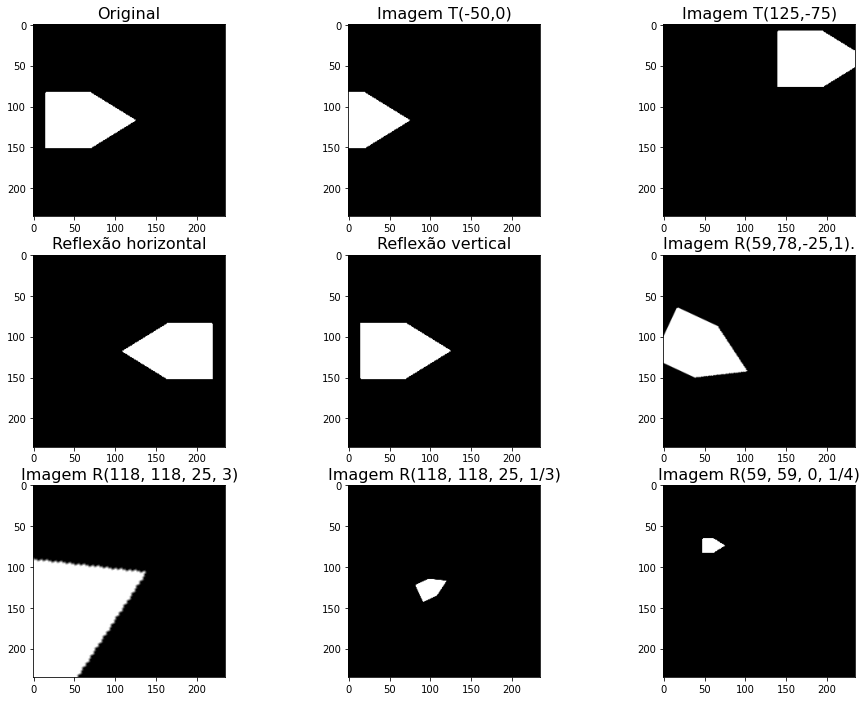

In [23]:
# --> QUESTÃO 4

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 12))

input_image= cv2.imread(os.path.join(".", "imagens", "Seta.tif"), 0) #imagem de entrada
axs[0][0].imshow(input_image, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

#Translação de -50 pixels na horizontal e 0 pixels na vertical.
imgS1= make_translation(input_image, -50, 0)
axs[0][1].imshow(imgS1, cmap="gray")
axs[0][1].set_title("Imagem T(-50,0)", fontsize = 16)

#Translação de 125 pixels na horizontal e -75 pixels na vertical.
imgS2= make_translation(input_image, 125, -75)
axs[0][2].imshow(imgS2, cmap="gray")
axs[0][2].set_title("Imagem T(125,-75)", fontsize = 16)

#Reflexão horizontal.
imgS3 = make_reflection(input_image, label = 'x')
axs[1][0].imshow(imgS3, cmap="gray")
axs[1][0].set_title("Reflexão horizontal", fontsize = 16) 

#Reflexão vertical.
imgS4 = make_reflection(input_image, label = 'y')
axs[1][1].imshow(imgS4, cmap="gray")
axs[1][1].set_title("Reflexão vertical", fontsize = 16)

#Rotação de -25° com relação ao ponto (x = 59, y = 78) e escala 1.
imgS5 = make_rotation(input_image, 59, 78, -25, 1)
axs[1][2].imshow(imgS5, cmap="gray")
axs[1][2].set_title("Imagem R(59,78,-25,1).", fontsize = 16)

#Rotação de 25° com relação ao ponto (x = 118, y = 118) e escala 3.
imgS6 = make_rotation(input_image, 118, 118, 25, 3);
axs[2][0].imshow(imgS6, cmap="gray")
axs[2][0].set_title("Imagem R(118, 118, 25, 3)", fontsize = 16)

#Rotação de 25° com relação ao ponto (x = 118, y = 118) e escala 1/3.
imgS7 = make_rotation(input_image, 118, 118, 25, 1/3);
axs[2][1].imshow(imgS7, cmap="gray")
axs[2][1].set_title("Imagem R(118, 118, 25, 1/3)", fontsize = 16)

#Rotação de 0° com relação ao ponto (x = 59, y = 59) e escala 1/4
imgS8 = make_rotation(input_image, 59, 59, 0, 1/4);
axs[2][2].imshow(imgS8, cmap="gray")
axs[2][2].set_title("Imagem R(59, 59, 0, 1/4)", fontsize = 16)

## <span style='color:green'>Respostas da Questão 4:</span>

* Aplicando as matrizes de transformações as imagens sofreram rotação, reflexão e translação de acordo com as funções utilizadas e os dados inseridos nelas.

### Dilatação e Erosão

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de erosão (1) e dilatação (2). A sintaxe das funções é: 

 1. `dst_img = cv2.erode( src_img, kernel, iterations = 1 )`    
 2. `dst_img = cv2.dilate( src_img, kernel, iterations = 1 )`   

* **Descrição:**  
    * **dst_img** representa a imagem de saída;
    * **src_img** representa a imagem de entrada;
    * **kernel** representa o elemento estruturante;
    * **iterations** corresponde ao número de vezes que a operação deve ser repetida.

Elementos estruturantes podem ser produzidos a partir de arrays do numpy.

## <span style='color:blue'>Questão 5: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Carregue a imagem "**text.tif**" e utilize o elemento estruturante abaixo para produzir uma versão dilatada da imagem e outra versão erodida. Comente os resultados encontrados.
    * `kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype = np.uint8)`

Text(0.5, 1.0, 'Imagem dilatada')

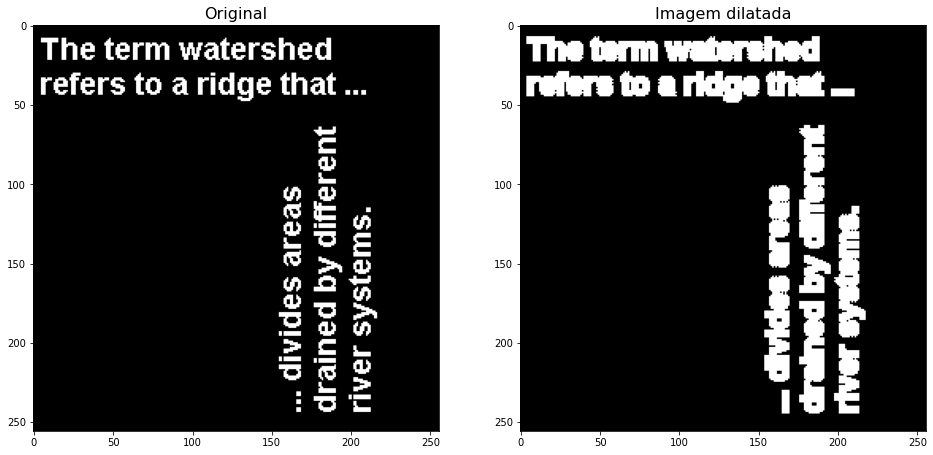

In [28]:
## --> QUESTÃO 5
input_image= cv2.imread(os.path.join(".", "imagens", "text.tif"), 0) #imagem de entrada
kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype = np.uint8) # definição kernel
dst_img = cv2.dilate( input_image, kernel, iterations = 1 ) # Imagem dilatada

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 12))

axs[0].imshow(input_image, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Imagem dilatada
axs[1].imshow(dst_img, cmap="gray")
axs[1].set_title("Imagem dilatada", fontsize = 16)

## <span style='color:green'>Respostas da Questão 5:</span>

* Quando  foia aplicada a dilatação na imagem, ela se tornou mais embaçada.

Elementos estruturantes também podem ser produzidos pela função **getStructuringElement** do OpenCV:

 * `kernel = cv2.getStructuringElement( FLAG, (W,H) )`

* **Descrição:**
    * **kernel** representa o elemento estruturante;
    * **(W, H)** é uma tupla com as dimensões do elemento estruturante;
    * **FLAG** é um parâmetro que indica o tipo de elemento estruturante produzido, pode ser:
        * **cv2.MORPH_RECT** produz um elemento retangular;
        * **cv2.MORPH_ELLIPSE** produz um elemento elíptico;
        * **cv2.MORPH_CROSS** produz um elemento em forma de cruz;

Text(0.5, 1.0, 'cv2.MORPH_CROSS')

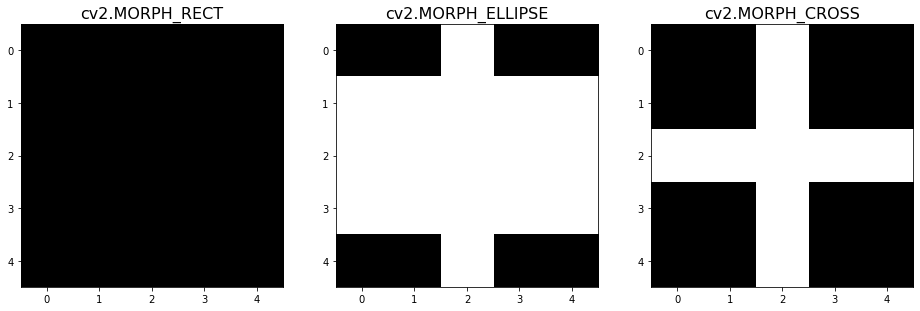

In [4]:
H, W = 5, 5

# plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 12))

# primeira Subfigura da primeira linha
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (W, H))
axs[0].imshow(kernel, cmap = "gray")
axs[0].set_title("cv2.MORPH_RECT", fontsize = 16)

# segunda Subfigura da primeira linha
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (W, H))
axs[1].imshow(kernel, cmap = "gray")
axs[1].set_title("cv2.MORPH_ELLIPSE", fontsize = 16)

# terceira Subfigura da primeira linha
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (W, H))
axs[2].imshow(kernel, cmap = "gray")
axs[2].set_title("cv2.MORPH_CROSS", fontsize = 16)

Ou ainda utilizando as funções do Scikit-Image:

 * `kernel = skimage.morphology.square( H )`
 * `kernel = skimage.morphology.rectangle( H, W )`
 * `kernel = skimage.morphology.diamond( H )`
 * `kernel = skimage.morphology.disk( R )`
 * `kernel = skimage.morphology.octagon( M, N )`
 * `kernel = skimage.morphology.star( A)`

Text(0.5, 1.0, 'Star')

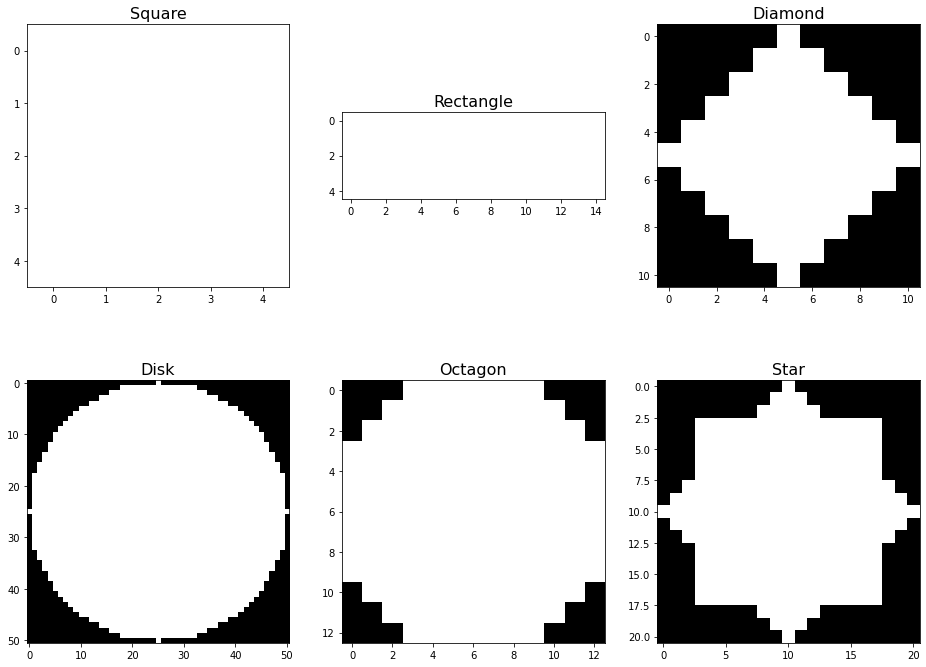

In [5]:
H =  5 # altura do quadrado/retângulo e lado do diamante
W = 15 # largura do retângulo
R = 25 # raio do disco
M =  7 # comprimento dos lados retos do octágono
N =  3 # comprimento dos lados inclinados do octágono
A =  7 # variável que controla o tamanho da estrela, o quadrado que a contém tem lado H = 2 * a + 1 + 2 * floor(a / 2) 

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

# primeira Subfigura da primeira linha 
kernel = skimage.morphology.square(H)
axs[0][0].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[0][0].set_title("Square", fontsize = 16)

# segunda Subfigura da primeira linha
kernel = skimage.morphology.rectangle(H, W)
axs[0][1].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[0][1].set_title("Rectangle", fontsize = 16)

# terceira Subfigura da primeira linha
kernel = skimage.morphology.diamond(H)
axs[0][2].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[0][2].set_title("Diamond", fontsize = 16)

# primeira Subfigura da segunda linha
kernel = skimage.morphology.disk(R)
axs[1][0].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[1][0].set_title("Disk", fontsize = 16)

# segunda Subfigura da segunda linha
kernel = skimage.morphology.octagon(M, N)
axs[1][1].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[1][1].set_title("Octagon", fontsize = 16)

# terceira Subfigura da segunda linha
kernel = skimage.morphology.star(A)
axs[1][2].imshow(kernel, vmin = 0, vmax = 1, cmap = "gray")
axs[1][2].set_title("Star", fontsize = 16)

Text(0.5, 1.0, 'Linha Vertical de 5 pontos')

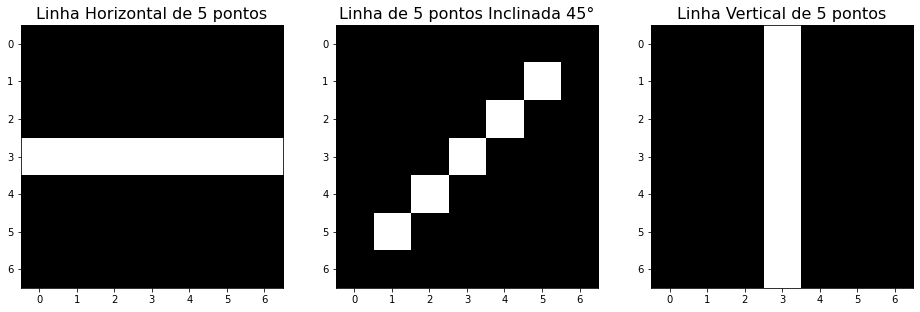

In [6]:
# elemento estruturante correspondente a uma linha horizontal
orig_kernel  = np.zeros((7, 7), dtype = np.uint8)
orig_kernel[3, :] = 1

# matriz de rotação para 45°
M = cv2.getRotationMatrix2D((3, 3), 45, 1)

# plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

# primeira subfigura da primeira linha
axs[0].imshow(orig_kernel, cmap = "gray")
axs[0].set_title("Linha Horizontal de 5 pontos", fontsize = 16)

# segunda subfigura da primeira linha
kernel = cv2.warpAffine(orig_kernel, M, (7, 7))
axs[1].imshow(kernel, cmap = "gray")
axs[1].set_title("Linha de 5 pontos Inclinada 45°", fontsize = 16)

# terceira subfigura da primeira linha
kernel = cv2.warpAffine(kernel, M, (7, 7))
axs[2].imshow(kernel, cmap = "gray")
axs[2].set_title("Linha Vertical de 5 pontos", fontsize = 16) 

## <span style='color:blue'>Questão 6: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Usando as funções mostradas, gere os seguintes elementos estruturantes para dilatar a imagem 'text.tif'. Mostre as imagens resultantes e comente os resultados encontrados.
 * Disco de raio 9;
 * Estrela com A = 13;
 * Linha vertical de 11 pontos de tamanho;
 * Linha vertical de 9 pontos de tamanho;

Text(0.5, 1.0, 'Linha vertical de 9 pontos')

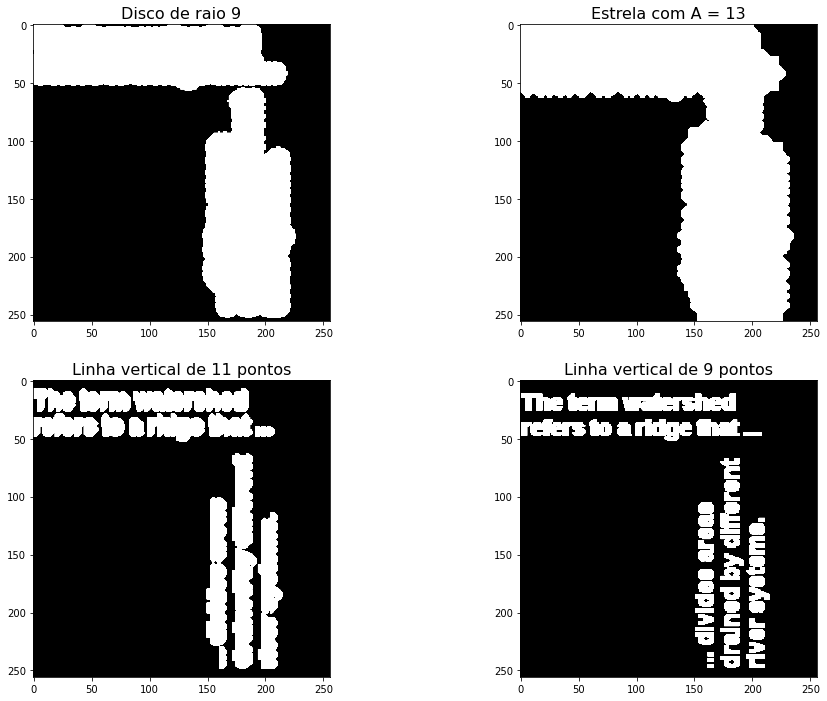

In [8]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 6

input_image= cv2.imread(os.path.join(".", "imagens", "text.tif"), 0) #imagem de entrada

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 12)) 

#----------------PRIMEIRA LINHA --------------------------

# primeira Subfigura da primeira linha 
# Disco de raio 9
kernel = skimage.morphology.disk(9) # definição kernel
dst_img = cv2.dilate( input_image, kernel, iterations = 1 ) # Imagem dilatada
axs[0][0].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][0].set_title("Disco de raio 9", fontsize = 16)

# segunda Subfigura da primeira linha
# Estrela com A = 13
kernel = skimage.morphology.star(13) # definição kernel
dst_img = cv2.dilate( input_image, kernel, iterations = 1 ) # Imagem dilatada
axs[0][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][1].set_title("Estrela com A = 13", fontsize = 16)

#----------------SEGUNDA LINHA --------------------------
# primeira Subfigura da segunda linha
#Linha vertical de 11 pontos de tamanho
kernel = cv2.warpAffine(kernel, M, (11, 11)) # definição kernel
dst_img = cv2.dilate( input_image, kernel, iterations = 1 ) # Imagem dilatada
axs[1][0].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][0].set_title("Linha vertical de 11 pontos", fontsize = 16)

# segunda Subfigura da segunda linha
#Linha vertical de 9 pontos de tamanho
kernel = cv2.warpAffine(kernel, M, (9, 9)) # definição kernel
dst_img = cv2.dilate( input_image, kernel, iterations = 1 ) # Imagem dilatada
axs[1][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][1].set_title("Linha vertical de 9 pontos", fontsize = 16)


## <span style='color:green'>Respostas da Questão 6:</span>

* Quanda as dilatações foram aplicada usando os diferentes kernels dados. As imagens geradas por tais sairam com a parte HIGH com as formas dos kernels. 

## <span style='color:blue'>Questão 7: [Valor da Questão: 1.5][Taxa de acerto: x.x]</span>

* Realize a erosão na imagem "**wirebond_mask.tif**" com um elemento estruturante formado por um diamante de raio 6. Varie o tamanho (raio) do elemento estruturante para 4 e 8 e mostre os resultados. Comente os resultados encontrados.

Text(0.5, 1.0, 'Diamante de raio 8')

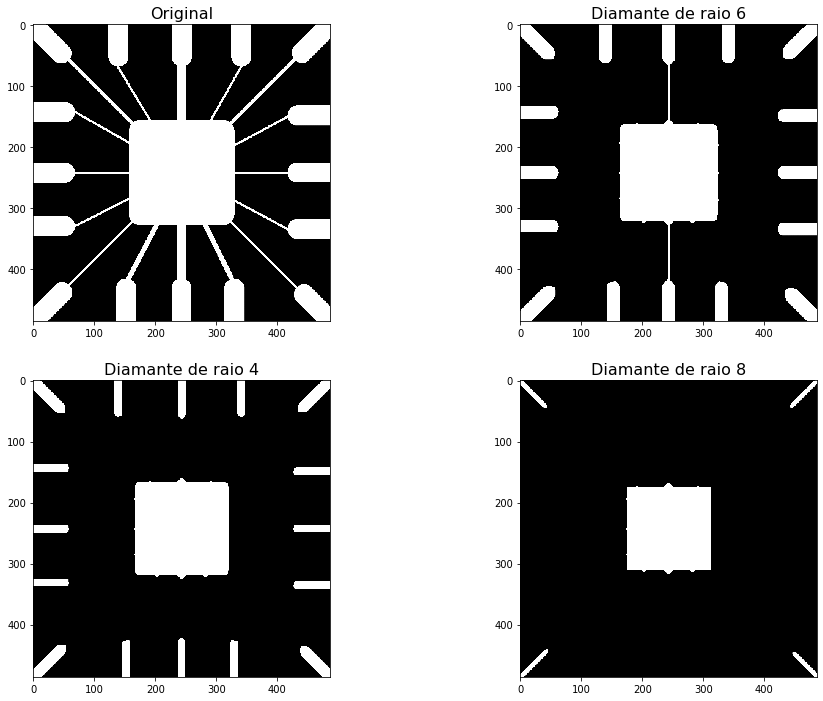

In [14]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 7
input_image= cv2.imread(os.path.join(".", "imagens", "wirebond_mask.tif"), 0) #imagem de entrada

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 12)) 

#----------------PRIMEIRA LINHA --------------------------

# primeira Subfigura da primeira linha 
axs[0][0].imshow(input_image, vmin = 0, vmax = 1, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

# segunda Subfigura da primeira linha
kernel = skimage.morphology.diamond( 6 ) # definição kernel
dst_img = cv2.erode( input_image, kernel, iterations = 1 ) 
axs[0][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][1].set_title("Diamante de raio 6", fontsize = 16)

#----------------SEGUNDA LINHA --------------------------
# primeira Subfigura da segunda linha
kernel = skimage.morphology.diamond( 4 ) # definição kernel
dst_img = cv2.erode( dst_img, kernel, iterations = 1 ) 
axs[1][0].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][0].set_title("Diamante de raio 4", fontsize = 16)

# segunda Subfigura da segunda linha
kernel = skimage.morphology.diamond( 8 ) # definição kernel
dst_img = cv2.erode( dst_img, kernel, iterations = 1 ) 
axs[1][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][1].set_title("Diamante de raio 8", fontsize = 16)


## <span style='color:green'>Respostas da Questão 7:</span>

* Adicione suas respostas aqui.

### Abertura e Fechamento

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de abertura e fechamento a partir de uma mesma função. Sua sintaxe é: 

* `dst_img = cv2.morphologyEx(src_img, FLAG, kernel)`       

* **Descrição:**
    * **dst_img** representa a imagem de saída;
    * **src_img** representa a imagem de entrada;
    * **kernel** representa o elemento estruturante;
    * **FLAG** é um parâmetro que indica a transformação realizada, pode ser:
        * **cv2.MORPH_OPEN** realiza uma operação de abertura;
        * **cv2.MORPH_CLOSE** realiza uma operação de fechamento;
        * **cv2.MORPH_GRADIENT** realiza uma operação de gradiente morfológico (diferença entre as versões dilatada e erodida de uma imagem);
        * **cv2.MORPH_TOPHAT** realiza uma operação de Tophat (diferença entre a imagem original e sua versão após abertura);
        * **cv2.MORPH_BLACKHAT** realiza uma operação de Blackhat (diferença entre a versão da imagem após fechamento e a original);

## <span style='color:blue'>Questão 8: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Aplique os seguintes filtros morfológicos na imagem "**shapes.tif**". Comente os resultados encontrados em todos os itens acima. Utilize mais células se achar necessário.
    * Abertura, utilizando um elemento estruturante quadrado (square) de altura 10.
    * Fechamento, utilizando um elemento estruturante quadrado de altura 10.
    * Uma abertura seguida de um fechamento, um elemento estruturante quadrado de altura 10.
    * Repetir o item anterior variando a altura do elemento estruturante para 5 e depois para 15. Analise os resultados encontrados.

Text(0.5, 1.0, 'abertura/fechamento - quadrado(5/15)')

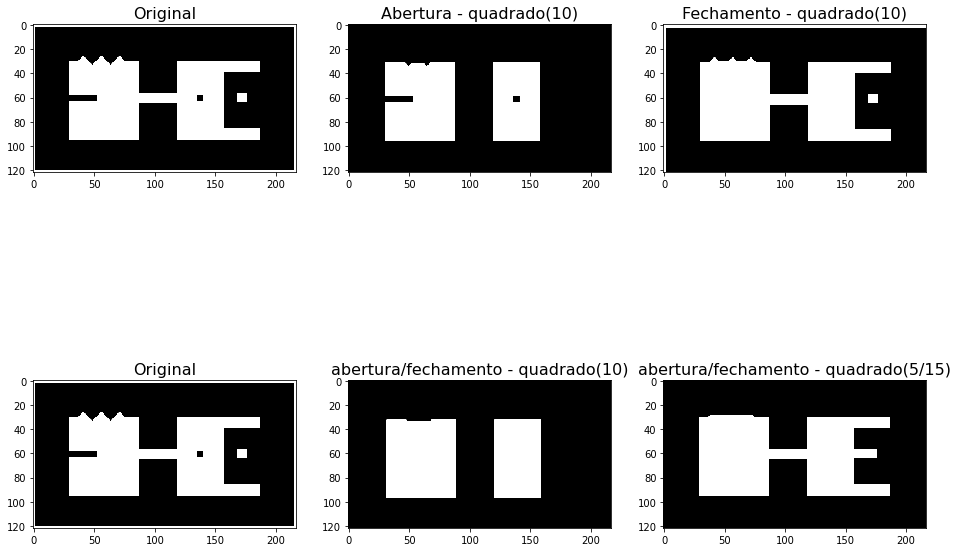

In [18]:
# IMPLEMENTE O SEU CÓDIGO AQUI --> QUESTÃO 7 (utilize mais células se achar necessário)
input_image= cv2.imread(os.path.join(".", "imagens", "shapes.tif"), 0) #imagem de entrada

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12)) 

#----------------PRIMEIRA LINHA --------------------------

# primeira Subfigura da primeira linha 
axs[0][0].imshow(input_image, vmin = 0, vmax = 1, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

# segunda Subfigura da primeira linha
kernel = skimage.morphology.square(10) # definição kernel
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel) 
axs[0][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][1].set_title("Abertura - quadrado(10)", fontsize = 16)

# terceira Subfigura da primeira linha
kernel = skimage.morphology.square(10) # definição kernel
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_CLOSE, kernel) 
axs[0][2].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][2].set_title("Fechamento - quadrado(10)", fontsize = 16)

#----------------SEGUNDA LINHA --------------------------

# primeira Subfigura da segunda linha
axs[1][0].imshow(input_image, vmin = 0, vmax = 1, cmap = "gray")
axs[1][0].set_title("Original", fontsize = 16)

# segunda Subfigura da segunda linha
kernel = skimage.morphology.square(10) # definição kernel
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel) 
dst_img = cv2.morphologyEx(dst_img, cv2.MORPH_CLOSE, kernel) 
axs[1][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][1].set_title("abertura/fechamento - quadrado(10)", fontsize = 16)

# terceira Subfigura da segunda linha
kernel = skimage.morphology.square(5) # definição kernel
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel)  
kernel = skimage.morphology.square(15) # definição kernel
dst_img = cv2.morphologyEx(dst_img, cv2.MORPH_CLOSE, kernel)
axs[1][2].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][2].set_title("abertura/fechamento - quadrado(5/15)", fontsize = 16)



## <span style='color:green'>Respostas da Questão 8:</span>

* Adicione suas respostas aqui.

## <span style='color:blue'>Questão 9: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Aplique os seguintes filtros morfológicos na imagem "**finger.jpg**". Comente os resultados encontrados em todos os itens.
    * Abertura, utilizando um elemento estruturante em formato de disco de raio 1.
    * Fechamento, utilizando um elemento estruturante em formato de disco de raio 1.
    * Uma abertura seguida de um fechamento com um elemento estruturante em formato de disco de raio 1.
    * Um fechamento seguido de uma abertura com um elemento estruturante em formato de disco de raio 1.

Text(0.5, 1.0, 'abertura/fechamento - quadrado(5/15)')

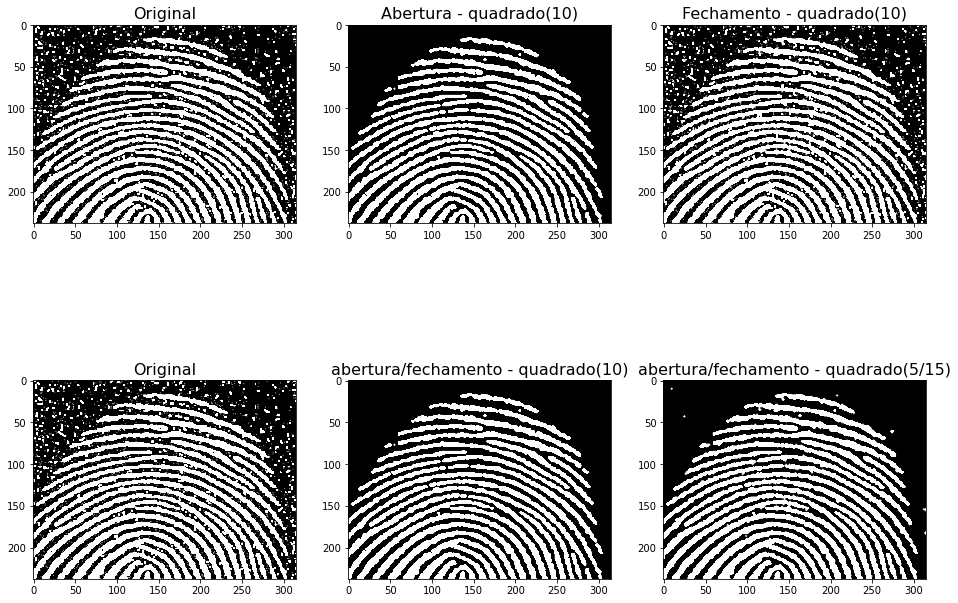

In [19]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 9
input_image= cv2.imread(os.path.join(".", "imagens", "finger.jpg"), 0) #imagem de entrada

kernel = skimage.morphology.disk( 1 ) # definição kernel

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12)) 

#----------------PRIMEIRA LINHA --------------------------

# primeira Subfigura da primeira linha 
axs[0][0].imshow(input_image, vmin = 0, vmax = 1, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

# segunda Subfigura da primeira linha
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel) 
axs[0][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][1].set_title("Abertura - quadrado(10)", fontsize = 16)

# terceira Subfigura da primeira linha
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_CLOSE, kernel) 
axs[0][2].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[0][2].set_title("Fechamento - quadrado(10)", fontsize = 16)

#----------------SEGUNDA LINHA --------------------------

# primeira Subfigura da segunda linha
axs[1][0].imshow(input_image, vmin = 0, vmax = 1, cmap = "gray")
axs[1][0].set_title("Original", fontsize = 16)

# segunda Subfigura da segunda linha
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel) 
dst_img = cv2.morphologyEx(dst_img, cv2.MORPH_CLOSE, kernel) 
axs[1][1].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][1].set_title("abertura/fechamento - quadrado(10)", fontsize = 16)

# terceira Subfigura da segunda linha
dst_img = cv2.morphologyEx(input_image, cv2.MORPH_CLOSE, kernel)  
dst_img = cv2.morphologyEx(dst_img, cv2.MORPH_OPEN, kernel)
axs[1][2].imshow(dst_img, vmin = 0, vmax = 1, cmap = "gray")
axs[1][2].set_title("abertura/fechamento - quadrado(5/15)", fontsize = 16)

## <span style='color:green'>Respostas da Questão 9:</span>

* Adicione suas respostas aqui.

![gif2](https://user-images.githubusercontent.com/58775072/142712675-08fa8843-9a5e-4109-a94a-8ca2d60e4fa8.gif)